**Домашнее задание №6 (разведывательный анализ). Выполнила: Ульяна Еськина (@import_brain_as_br)**

Alzheimer's Disease Dataset — https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (5, 3)

In [3]:
df = pd.read_csv('alzheimers_disease_data.csv')
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [4]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [6]:
# Средний возраст участников и доля заболевших на момент исследования:

df[['Age', 'Diagnosis']].mean()

Age          74.908795
Diagnosis     0.353653
dtype: float64

<Axes: title={'center': 'Половозрастная структура\n(gender: 0 - М, 1 - Ж)'}, xlabel='Gender', ylabel='Age'>

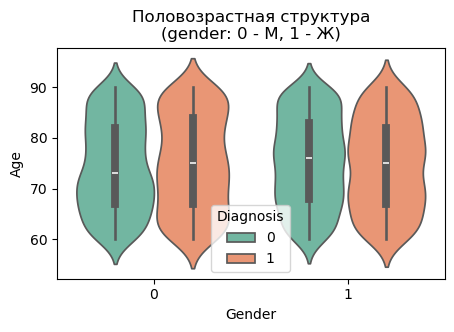

In [7]:
plt.title('Половозрастная структура\n(gender: 0 - М, 1 - Ж)')

sns.violinplot(data=df,
               x='Gender',
               y='Age',
               hue='Diagnosis',
               palette='Set2',
               legend=True)

<Axes: title={'center': 'Различие в длительности сна'}, xlabel='Diagnosis', ylabel='SleepQuality'>

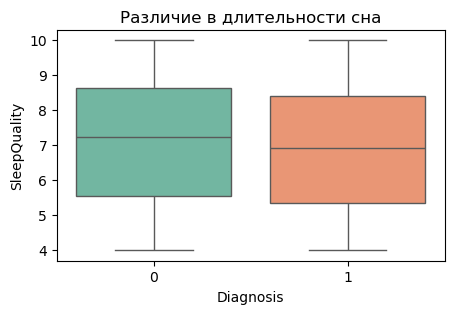

In [8]:
plt.title('Различие в длительности сна')

sns.boxplot(data=df,
            x='Diagnosis',
            y='SleepQuality',
            hue='Diagnosis',
            palette='Set2',
            legend=False)

<Axes: title={'center': 'Различие в индексе массы тела'}, xlabel='Diagnosis', ylabel='BMI'>

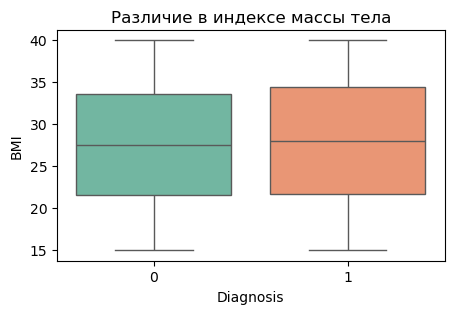

In [9]:
plt.title('Различие в индексе массы тела')

sns.boxplot(data=df,
            x='Diagnosis',
            y='BMI',
            hue='Diagnosis',
            palette='Set2',
            legend=False)

<Axes: title={'center': 'Различие в образовании\n(0: без образования, 1: High School,\n2: бакалавриат, 3: выше бакалавриата)'}, xlabel='Diagnosis', ylabel='EducationLevel'>

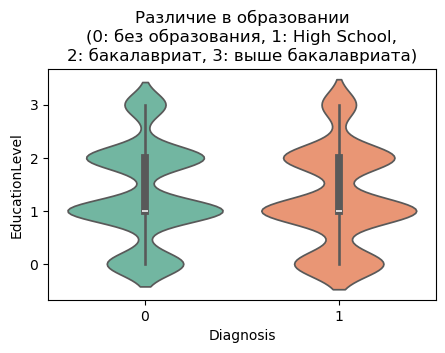

In [10]:
plt.title('Различие в образовании\n(0: без образования, 1: High School,\n2: бакалавриат, 3: выше бакалавриата)')

sns.violinplot(data=df,
               x='Diagnosis',
               y='EducationLevel',
               hue='Diagnosis',
               palette='Set2',
               legend=False)

In [11]:
# Распределение по уровню образования (0: None, 1: High School, 2: Bachelor's, 3: Higher):

ed_level = df.groupby(['EducationLevel', 'Diagnosis']).agg({'EducationLevel': 'count'})
ed_level = ed_level.rename(columns={'EducationLevel': 'Count'})
ed_level

Count
EducationLevel Diagnosis       
0              0            272
               1            174
1              0            552
               1            302
2              0            419
               1            217
3              0            146
               1             67

In [12]:
# Средний уровень образования заболевших (на момент исследования):
d1 = df.query('Diagnosis == 1')
d1['EducationLevel'].mean()

1.2328947368421053

In [13]:
# Средний уровень образования НЕ заболевших (на момент исследования):

d0 = df.query('Diagnosis == 0')
d0['EducationLevel'].mean()

1.3160547156227502

In [14]:
# Доля заболевших, по уровням образования:
ed_levels_count = 4
for e in range(ed_levels_count):
    print(f'Education level {e}: {ed_level['Count'][e][1] / (ed_level['Count'][e][0] + ed_level['Count'][e][1])}')

Education level 0: 0.3901345291479821
Education level 1: 0.35362997658079626
Education level 2: 0.3411949685534591
Education level 3: 0.3145539906103286
